# Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
np.random.seed(42)
data_size = 120

df = pd.DataFrame({
    "Age": np.random.normal(30, 8, data_size).round(),
    "Salary": np.random.normal(50000, 15000, data_size).round(),
    "Gender": np.random.choice(["Male", "Female"], data_size),
    "Department": np.random.choice(["IT", "HR", "Finance", "Marketing"], data_size),
    "Education": np.random.choice(["School", "Graduate", "Postgraduate"], data_size),
    "Rating": np.random.choice(["Poor", "Average", "Good", "Excellent"], data_size)
})

df.loc[np.random.choice(df.index, 15), "Age"] = np.nan
df.loc[np.random.choice(df.index, 20), "Salary"] = np.nan

In [31]:
df

,Age,Salary,Gender,Department,Education,Rating
0,34.0,61865.0,Female,Finance,School,Excellent
1,29.0,36359.0,Female,HR,Graduate,Average
2,35.0,71042.0,Male,HR,Graduate,Average
3,NaN,28972.0,Female,IT,School,Good
4,NaN,58803.0,Male,Finance,School,Poor
...,...,...,...,...,...,...
115,32.0,59509.0,Male,IT,School,Poor
116,30.0,19623.0,Female,Finance,Postgraduate,Average
117,21.0,NaN,Male,Finance,School,Poor
118,NaN,40073.0,Male,HR,Graduate,Excellent


In [32]:
num_cols = ["Age", "Salary"]
nominal_cols = ["Gender", "Department"]
ordinal_cols = ["Education", "Rating"]

In [33]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

In [34]:
nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

In [35]:
ordinal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(
        categories=[
            ["Schools", "Graduates", "Postgraduates"],
            ["Poor, Average", "Good", "Excellent"],
        ],
        handle_unknown="use_encoded_value",
        unknown_value=-1
    )),
])

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("nominal", nominal_pipeline, nominal_cols),
        ("ordinal", ordinal_pipeline, ordinal_cols),
    ]
)

In [37]:
processed_data = preprocessor.fit_transform(df)

In [38]:
processed_data.shape

(120, 10)

In [39]:
processed_data

array([[ 7.08181693e-01,  7.91553538e-01,  1.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00,  2.00000000e+00],
       [-5.38541212e-03, -1.05289615e+00,  1.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [ 8.50895114e-01,  1.45518228e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       ...,
       [-1.14709278e+00, -5.26156110e-16,  0.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-5.07019923e-16, -7.84320672e-01,  0.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00,  2.00000000e+00],
       [ 9.93608535e-01,  8.58227364e-01,  1.00000000e+00, ...,
         0.00000000e+00, -1.00000000e+00,  1.00000000e+00]],
      shape=(120, 10))

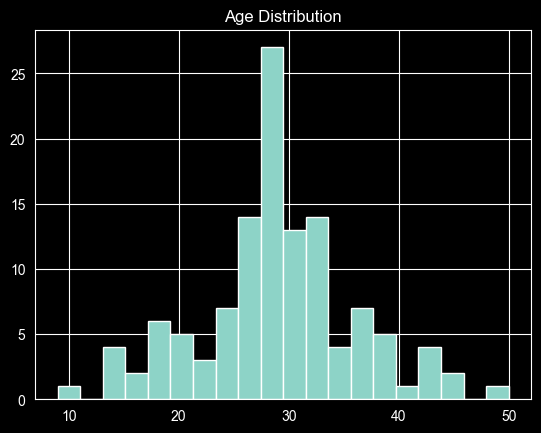

In [44]:
age_filled = df["Age"].fillna(df["Age"].mean())

plt.hist(age_filled, bins=20)
plt.title("Age Distribution")
plt.show()